# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


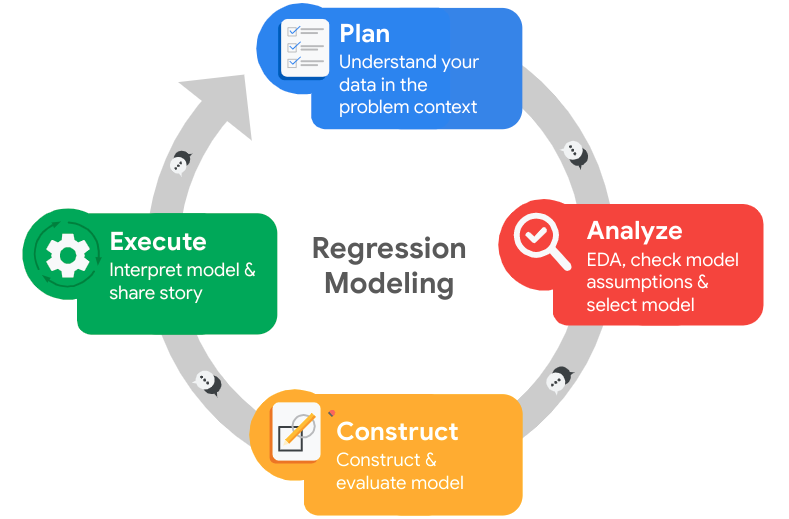

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#stats packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

#modelling packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [26]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [6]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
### YOUR CODE HERE ###
print(df.columns.tolist())


['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [4]:
# Rename columns as needed
### YOUR CODE HERE ###
df=df.rename(columns={"Work_accident": "work_accident", "Department": "department","promotion_last_5years":'promotion_last_five_years','average_montly_hours':'average_monthly_hours'})

# Display all column names after the update
### YOUR CODE HERE ###
print(df.columns.tolist())

['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'work_accident', 'left', 'promotion_last_five_years', 'department', 'salary']


### Check missing values

Check for any missing values in the data.

In [5]:
# Check for missing values
### YOUR CODE HERE ###
df.isnull().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_monthly_hours        0
time_spend_company           0
work_accident                0
left                         0
promotion_last_five_years    0
department                   0
salary                       0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [6]:
# Check for duplicates
### YOUR CODE HERE ###
df.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [142]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df.tail()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_five_years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [7]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1=df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_five_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

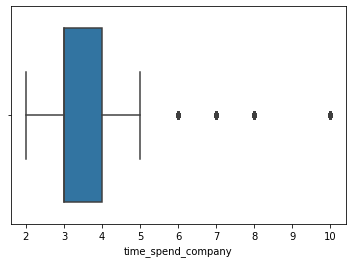

In [144]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(data=df1,x='time_spend_company')
plt.show()

In [8]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

df2= df1[df1['time_spend_company'] >5].reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   satisfaction_level         824 non-null    float64
 1   last_evaluation            824 non-null    float64
 2   number_project             824 non-null    int64  
 3   average_monthly_hours      824 non-null    int64  
 4   time_spend_company         824 non-null    int64  
 5   work_accident              824 non-null    int64  
 6   left                       824 non-null    int64  
 7   promotion_last_five_years  824 non-null    int64  
 8   department                 824 non-null    object 
 9   salary                     824 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 64.5+ KB


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [146]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [9]:
# Create a plot as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_five_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


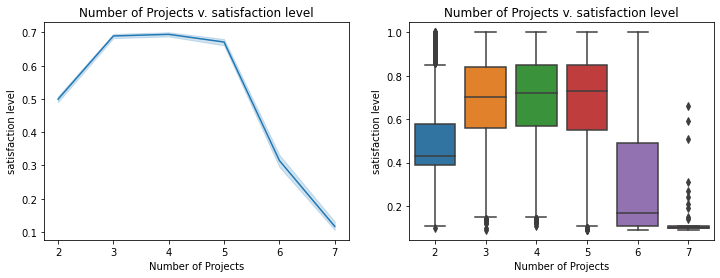

In [9]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, axes = plt.subplots(1, 2, figsize = (12,4))
sns.lineplot(data=df1,x='number_project',y='satisfaction_level',ax=axes[0])
# Set the x axis label
axes[0].set_xlabel("Number of Projects")

# Set the y axis label
axes[0].set_ylabel("satisfaction level")

# Set the title
axes[0].set_title("Number of Projects v. satisfaction level")

sns.boxplot(data=df1,x='number_project',y='satisfaction_level',ax=axes[1])
# Set the x axis label
axes[1].set_xlabel("Number of Projects")

# Set the y axis label
axes[1].set_ylabel("satisfaction level")

# Set the title
axes[1].set_title("Number of Projects v. satisfaction level")


plt.show()

Text(0.5, 1.0, 'average monthly hours v. satisfaction level')

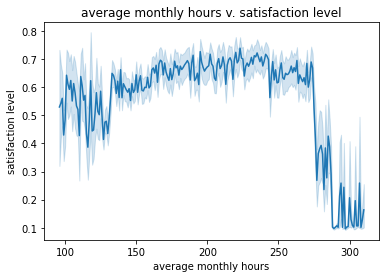

In [148]:
# Create a plot as needed
### YOUR CODE HERE ###
# satisfaction level vs average monthly hours scatter

fig=sns.lineplot(data=df1,x='average_monthly_hours',y='satisfaction_level')

fig.set_xlabel("average monthly hours")

# Set the y axis label
fig.set_ylabel("satisfaction level")

# Set the title
fig.set_title("average monthly hours v. satisfaction level")

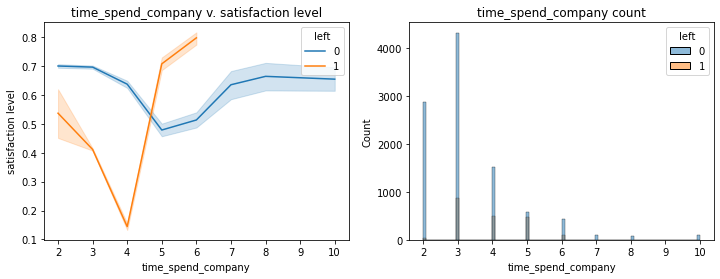

In [12]:
# Create a plot as needed
### YOUR CODE HERE ###
# satisfaction level vs time spend company

fig, axes = plt.subplots(1, 2, figsize = (12,4))
sns.lineplot(data=df1,x='time_spend_company',y='satisfaction_level',hue='left',ax=axes[0])
# Set the x axis label
axes[0].set_xlabel("time_spend_company")

# Set the y axis label
axes[0].set_ylabel("satisfaction level")

# Set the title
axes[0].set_title("time_spend_company v. satisfaction level")

sns.histplot(data=df1,x='time_spend_company',ax=axes[1],hue='left')
# Set the x axis label
axes[1].set_xlabel("time_spend_company")


# Set the title
axes[1].set_title("time_spend_company count")


plt.show()

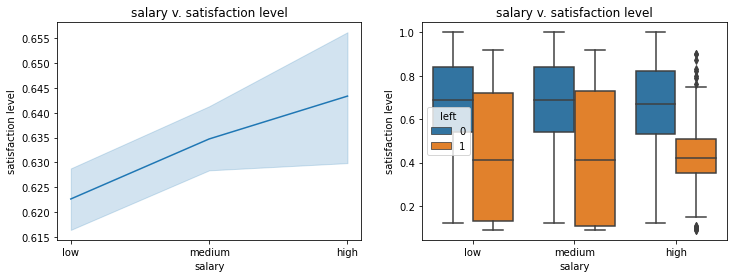

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
# satisfaction level vs salary box plots

fig, axes = plt.subplots(1, 2, figsize = (12,4))
sns.lineplot(data=df1,x='salary',y='satisfaction_level',ax=axes[0])
# Set the x axis label
axes[0].set_xlabel("salary")

# Set the y axis label
axes[0].set_ylabel("satisfaction level")

# Set the title
axes[0].set_title("salary v. satisfaction level")

sns.boxplot(data=df1,x='salary',y='satisfaction_level',ax=axes[1],hue='left')
# Set the x axis label
axes[1].set_xlabel("salary")

# Set the y axis label
axes[1].set_ylabel("satisfaction level")

# Set the title
axes[1].set_title("salary v. satisfaction level")


plt.show()

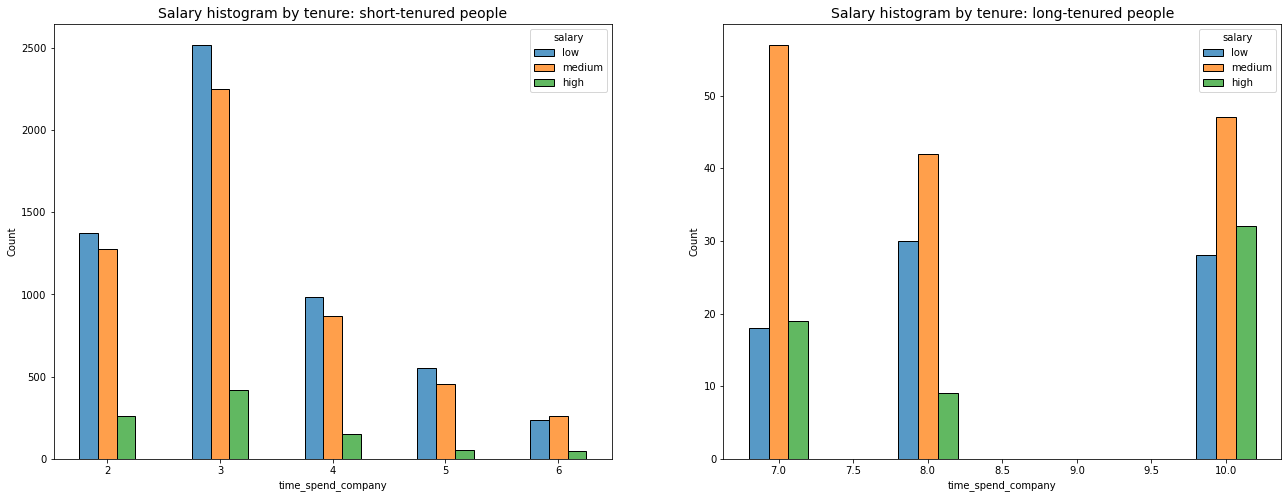

In [158]:
# Salary vs tenure
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['time_spend_company'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['time_spend_company'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='time_spend_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='time_spend_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

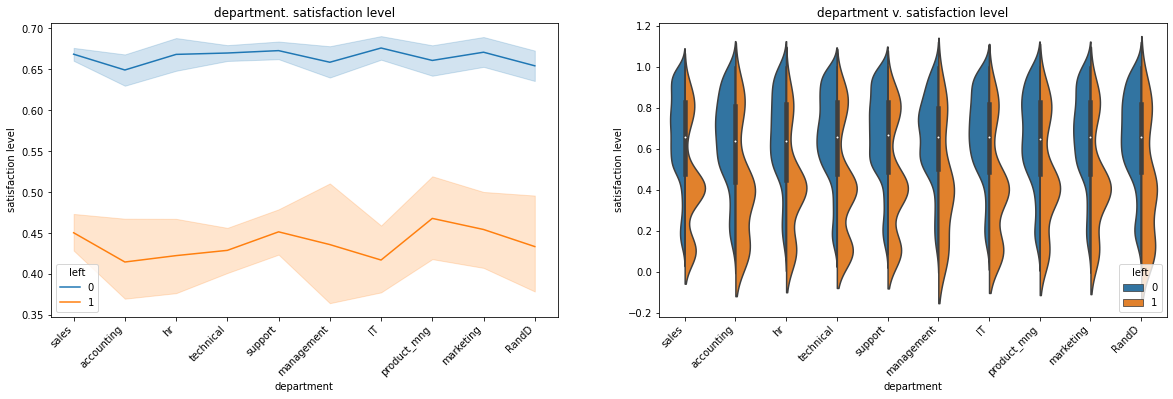

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
# satisfaction level vs department box plots
fig, axes = plt.subplots(1, 2, figsize = (20,6))
sns.lineplot(data=df1,x='department',y='satisfaction_level',ax=axes[0],hue='left')
# Set the x axis label
axes[0].set_xlabel("department")

# Set the y axis label
axes[0].set_ylabel("satisfaction level")

# Set the title
axes[0].set_title("department. satisfaction level")

sns.violinplot(data=df1,x='department',y='satisfaction_level',ax=axes[1],hue='left',split=True)
# Set the x axis label
axes[1].set_xlabel("department")

# Set the y axis label
axes[1].set_ylabel("satisfaction level")

# Set the title
axes[1].set_title("department v. satisfaction level")

fig.autofmt_xdate(rotation=45)
plt.show()

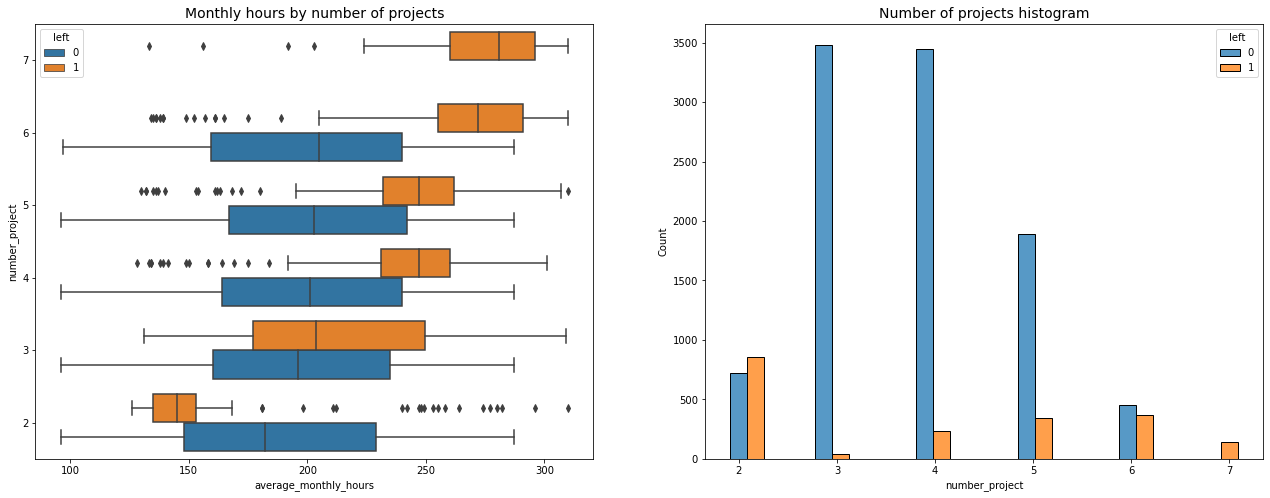

In [149]:
#average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

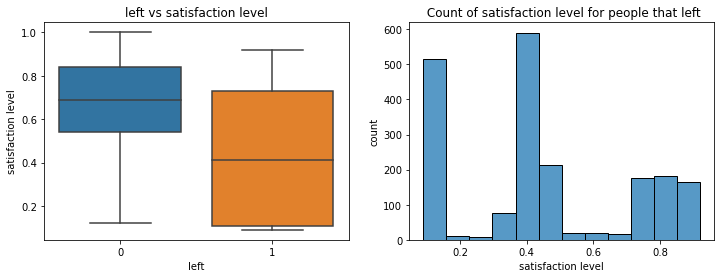

In [131]:
# Create a plot as needed
### YOUR CODE HERE ###
# left vs satisfaction 


df3= df1[df1['left']==1]


fig, axes = plt.subplots(1, 2, figsize = (12,4))
sns.boxplot(data=df1,x='left',y='satisfaction_level',ax=axes[0])
# Set the x axis label
axes[0].set_xlabel("left")

# Set the y axis label
axes[0].set_ylabel("satisfaction level")

# Set the title
axes[0].set_title("left vs satisfaction level")

sns.histplot(data=df3,x='satisfaction_level',ax=axes[1])
# Set the x axis label
axes[1].set_xlabel("satisfaction level")

# Set the y axis label
axes[1].set_ylabel("count")

# Set the title
axes[1].set_title( " Count of satisfaction level for people that left")


plt.show()

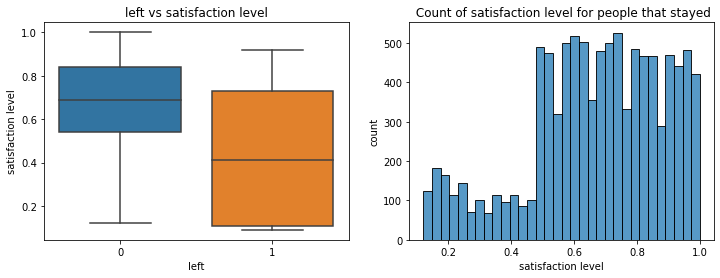

In [130]:
# Create a plot as needed
### YOUR CODE HERE ###
df4=df1[df1['left']==0]

fig, axes = plt.subplots(1, 2, figsize = (12,4))
sns.boxplot(data=df1,x='left',y='satisfaction_level',ax=axes[0])
# Set the x axis label
axes[0].set_xlabel("left")

# Set the y axis label
axes[0].set_ylabel("satisfaction level")

# Set the title
axes[0].set_title("left vs satisfaction level")

sns.histplot(data=df4,x='satisfaction_level',ax=axes[1])
# Set the x axis label
axes[1].set_xlabel("satisfaction level")

# Set the y axis label
axes[1].set_ylabel("count")

# Set the title
axes[1].set_title( " Count of satisfaction level for people that stayed")


plt.show()

Text(0.5, 1.0, 'work_accident vs satisfaction level')

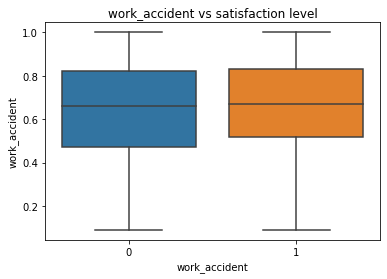

In [125]:
# satisfaction level vs work accident

fig=sns.boxplot(data=df1,x='work_accident',y='satisfaction_level')

fig.set_xlabel("work_accident")

# Set the y axis label
fig.set_ylabel("work_accident")

# Set the title
fig.set_title("work_accident vs satisfaction level")

In [151]:
#create columns that shows average working hours on average per department

avg_dep_hours=pd.DataFrame(df1.groupby('department')['average_monthly_hours'].mean())
avg_dep_hours_dict={'IT': 200.63831967213116,
  'RandD': 201.29106628242076,
  'accounting': 200.87761674718197,
  'hr': 199.3710482529118,
  'management': 201.52981651376146,
  'marketing': 199.48736998514116,
  'product_mng': 198.8935860058309,
  'sales': 200.24205001543686,
  'support': 200.6271279516749,
  'technical': 201.11541889483067}


df1['avg_dep_hours']=round(df1['department'].map(avg_dep_hours_dict),2)
# now we can create charts using our new variable

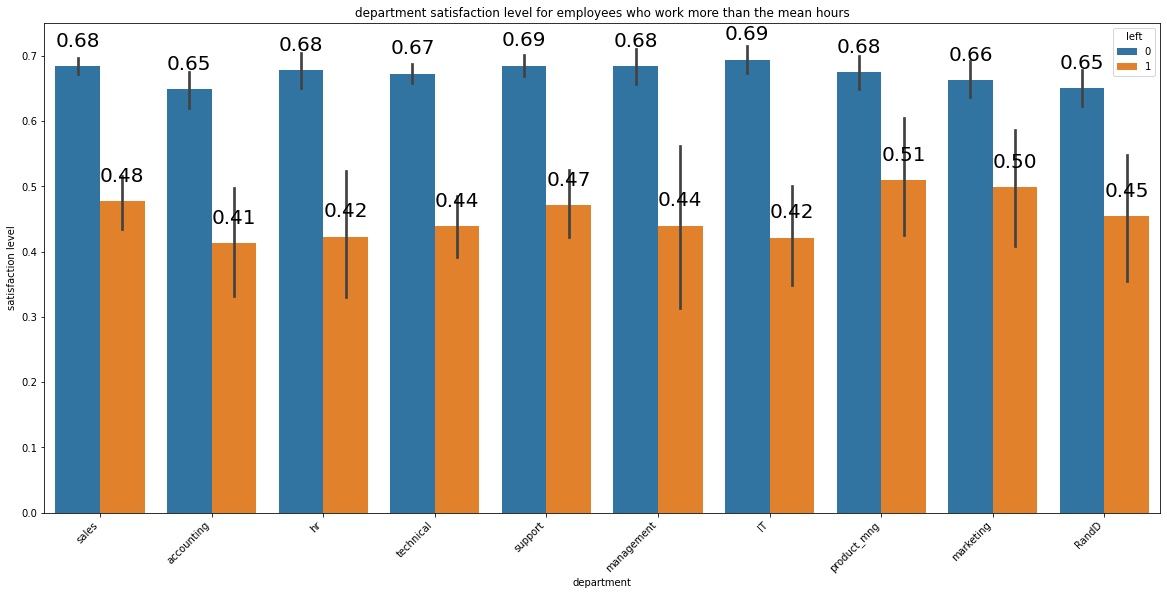

In [152]:
# satisfaction levels per department for people with less than avg hours per department

less_per_dep=df1[df1['average_monthly_hours'] > df1['avg_dep_hours']]
fig, ax = plt.subplots(figsize = (20,10))

sns.barplot(data=less_per_dep,x='department',y='satisfaction_level',hue='left')
# Set the x axis label
ax.set_xlabel("department")

# Set the y axis label
ax.set_ylabel("satisfaction level")

# Set the title
ax.set_title("department satisfaction level for employees who work more than the mean hours")

fig.autofmt_xdate(rotation=45)
#function for values
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = (p.get_y() + p.get_height()) +0.03
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center",fontsize=20)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)

plt.show()

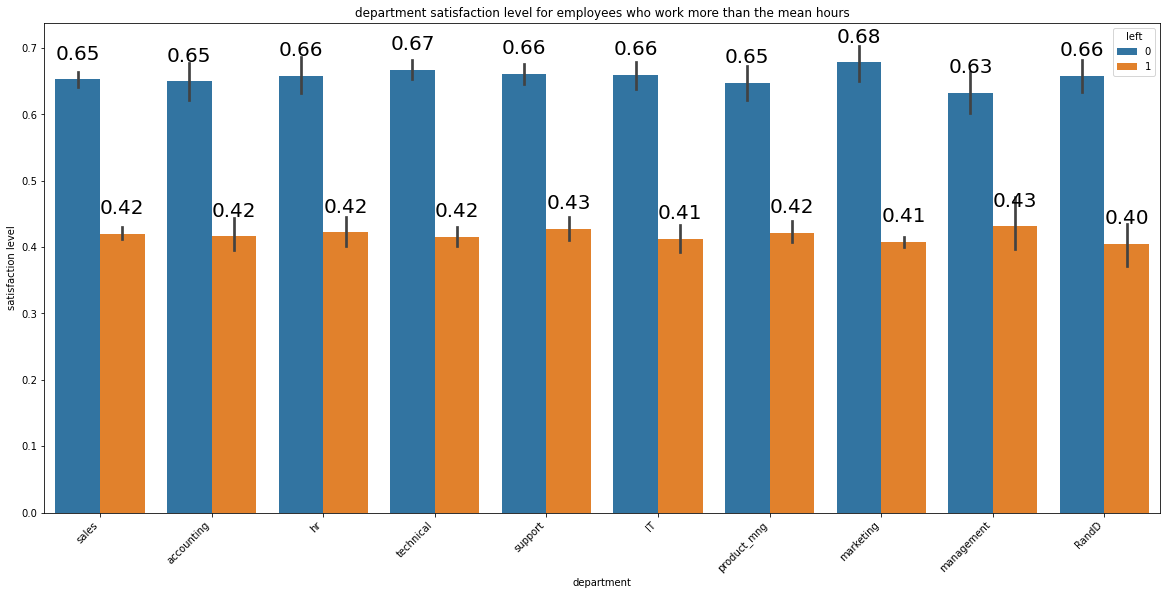

In [153]:
# satisfaction levels per department for people with more  than avg hours per department
more_per_dep=df1[df1['average_monthly_hours'] <= df1['avg_dep_hours']]
fig, ax = plt.subplots(figsize = (20,10))

sns.barplot(data=more_per_dep,x='department',y='satisfaction_level',hue='left')
# Set the x axis label
ax.set_xlabel("department")

# Set the y axis label
ax.set_ylabel("satisfaction level")

# Set the title
ax.set_title("department satisfaction level for employees who work more than the mean hours")

fig.autofmt_xdate(rotation=45)
#function for values
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = (p.get_y() + p.get_height()) +0.03
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center",fontsize=20)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)

plt.show()

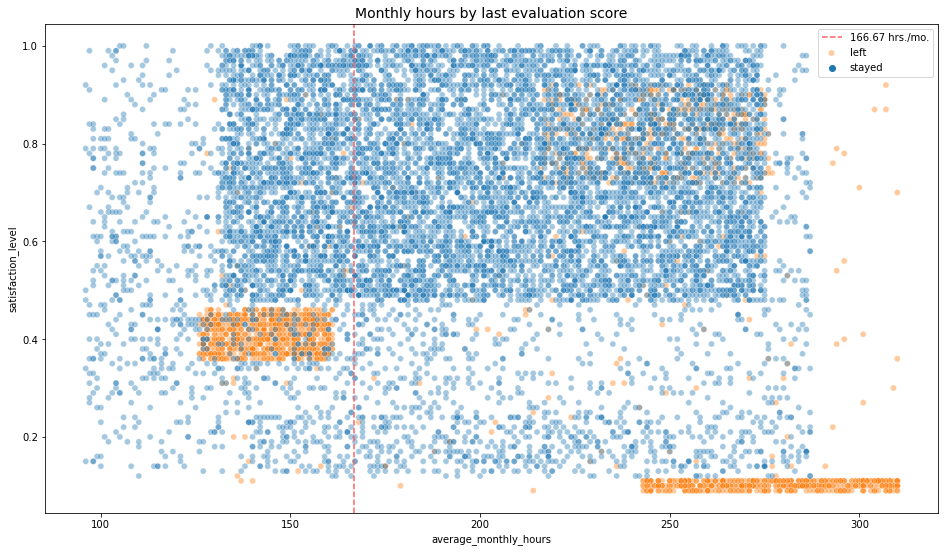

In [154]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

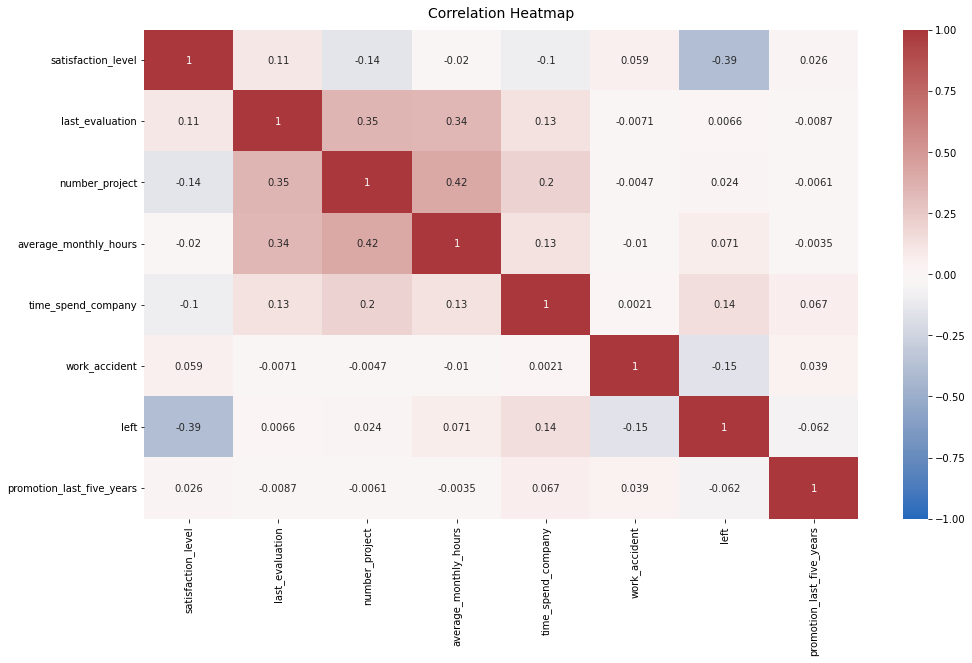

In [156]:
# =Correlation heat map
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

-For the relationship between Number of projects and satisfaction level: after 5 projects satisfaction exponentially decreases. Before this satisfaction level is relatively similiar with a noticeable drop at 2 projects. The boxplot replicates this data, and further proves that as number of projects increase so does mean satisfaction, but their is a heavy decline at 6 projects. Whats also interesting is the range of values represented by the interquartile range increases as number of projects increase. 

-For the relationship between average monthly hours and satisfaction level: similiarly to no. of projects and satisfaction level, there is a steady incline until a huge drop off. This relationship is somewhat self explnatory from a psychological point of view. Lower hours can lead to either disgruntled employees due to lack of work, or happy employees due to lack of work, while once a certain hour threshold is passed, employee satisfaction will decline as their work life balance becomes unhealthy.

-For the relationship between years spent with the company and satisfaction level: There is an intial decline in satisfaction  but after year 4 there is a steady increase in satisfaction level each year. However in conjunction with the distribution of employees count per year working at the company this shows a more representative picture of the relationship. Employees who have been at the company for 2-4 years make up the majority of the company while also being the most dissatisfied.

-For the relationship between salary and satisfaction level: Fairly self explantory, as salary increases so does satisfaction, however this relationship is fairly weak, the increase in mean satisfaction is quite small. The IQR is the biggest telling point showing that as salary increases the range of values of satisfaction decreases. In conjunction with the information provided from the bar chart of salary vs tenure, we can come to the conclusion that the proportion of different salaries across different tenures is similiar. These findings hint at why satisfaction doesn't change across salary. If there is a similiar proportion of different salaries across different tenures, then there would be equal proportion of upset employees across all tenures and thus all salary brackets, therefore satisfaction would not be changed.

-For the relationship between department and satisfaction level: This relationship is relatively weak. Across all departments the mean satisfaction is similiar with some up and downs but nothing too large. This indicates that the department variable may not be beneficial going foward.

-For the relationship between work_accident and satisfaction level: Neglible difference between satisfaction for people who have had a work accident and those that havent.

-For the relationship between employee churn and satisfaction level: The relationship is expected. The mean satisfaction level of employees that left was low while employees that stayed had a high satisfaction rate. The IQR of the employees that left was interesting as the upper boundary was around 0.7. Further investigating this in the second graph shows that a large proportion of employees left even with a high satisfaction level. This needs to be further investigated to figure out why the left. In terms of employees that stayed, this is also validated by the histogram " Count of satisfaction level for people that stayed", higher count of people who stayed who had a higher satisfaction compared to those that dont.

-For the relationship between satisfaction levels per department for people with more  than avg hours per department and satisfaction levels per department for people with less  than avg hours per department: From the last two bar graphs we can see that there isn't really a difference between the satisfaction levels of those who work over the department mean and those that do. This can be considered neglible.



-For the relationship betweeen people who left, number of projects and average hours:
1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/week&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

-For the relationshipo between avergage monthly hour and satisfaction level: 
1. The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

2. The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

3. Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 


-For the correlation between variables shown by the heatmap:
1. The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [17]:
### YOUR CODE HERE ###
df1.head()
df_dummies=pd.get_dummies(df1,columns= ['department','salary'])
df_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_five_years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## Modeling type 1: Logistic Regression

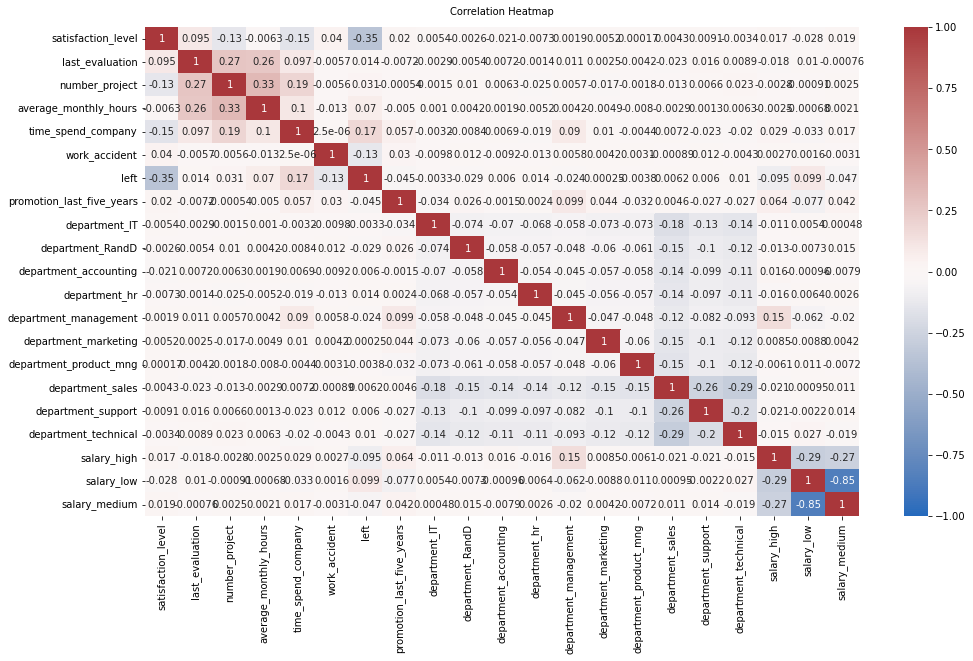

In [19]:
#first we have to check assumptions
#correlation assumption
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_dummies.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);

In [27]:
#removing Outliers for logreg

# Compute the 25th percentile value in `tenure`
percentile25 = df1['time_spend_company'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['time_spend_company'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df_logreg = df_dummies[(df_dummies['time_spend_company'] >= lower_limit) & (df_dummies['time_spend_company'] <= upper_limit)]
df_logreg.shape

(11167, 21)

In [49]:
#prepare x and y variables for train test validate split

#y
y=df_logreg['left']
#X
X=df_logreg.drop(columns=['left'])


# 3. Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

In [50]:
for x in [X_train, X_val, X_test]:
    print(len(x))

6699
2234
2234


In [51]:
#instantiate and run the logistic regression

logreg=LogisticRegression(penalty='none', max_iter=400)

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#model variables intercepts
pd.Series(logreg.coef_[0], index=X.columns)

satisfaction_level          -4.535213
last_evaluation             -0.005311
number_project              -0.516459
average_monthly_hours        0.004021
time_spend_company           1.103960
work_accident               -1.607287
promotion_last_five_years   -1.013515
department_IT               -0.192820
department_RandD            -0.491474
department_accounting       -0.172830
department_hr               -0.074384
department_management       -0.261898
department_marketing        -0.023084
department_product_mng      -0.145382
department_sales            -0.009407
department_support           0.026697
department_technical        -0.022289
salary_high                 -1.324941
salary_low                   0.176374
salary_medium               -0.218304
dtype: float64

In [53]:
#model intercept
logreg.intercept_

array([-1.36687094])

In [54]:
training_probabilities = logreg.predict_proba(X_train)
training_probabilities

array([[0.95061526, 0.04938474],
       [0.94343336, 0.05656664],
       [0.98227449, 0.01772551],
       ...,
       [0.95180545, 0.04819455],
       [0.39654209, 0.60345791],
       [0.71565716, 0.28434284]])

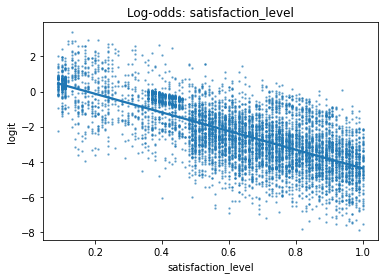

In [55]:
#checking logit assumption for all non categorical variables:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

# Plot regplot of 'satisfaction_level log-odds
sns.regplot(x='satisfaction_level', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: satisfaction_level');



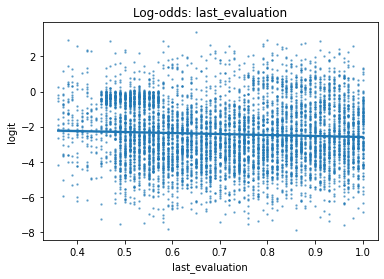

In [56]:
# Plot regplot of last_evaluation log-odds
sns.regplot(x='last_evaluation', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: last_evaluation');

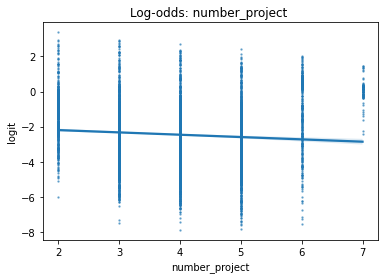

In [57]:
# Plot regplot of number_project  log-odds
sns.regplot(x='number_project', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: number_project ');

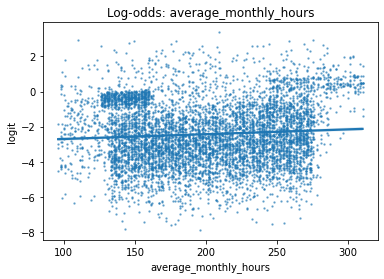

In [58]:
# Plot regplot of average_monthly_hours log-odds
sns.regplot(x='average_monthly_hours', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: average_monthly_hours');

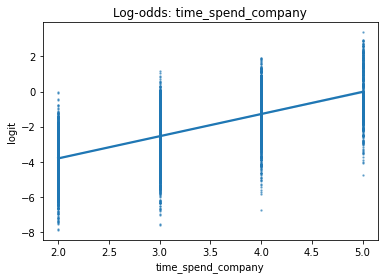

In [59]:
# Plot regplot of time_spend_company log-odds
sns.regplot(x='time_spend_company', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: time_spend_company');

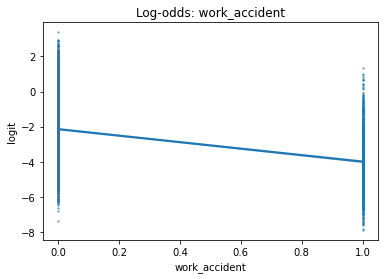

In [60]:
# Plot regplot of work_accident log-odds
sns.regplot(x='work_accident', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: work_accident');

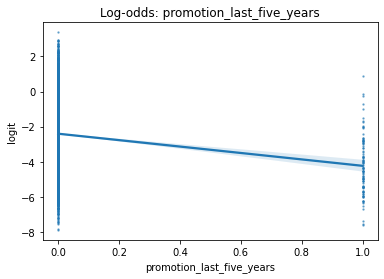

In [61]:
# Plot regplot of promotion_last_five_years log-odds
sns.regplot(x='promotion_last_five_years', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: promotion_last_five_years');

As all assumptions have now been meet we can apply the test data

In [63]:
# Generate predictions on X_val
y_preds = logreg.predict(X_val)

In [64]:
# Score the model (accuracy) on the test data
logreg.score(X_val, y_val)

0.8263205013428827

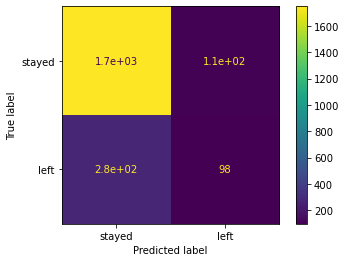

In [65]:
#confusion matrix

cm = confusion_matrix(y_val, y_preds)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['stayed', 'left'],
                              )
disp.plot();

In [68]:
# Calculate precision manually
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.47115384615384615

In [67]:
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.26063829787234044

In [71]:
# calculate f1 score
f1=f1_score(y_val, y_preds)
f1

0.3356164383561644

In [69]:
# Create a classification report
target_labels = ['stayed', 'left']
print(classification_report(y_val, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

      stayed       0.86      0.94      0.90      1858
        left       0.47      0.26      0.34       376

    accuracy                           0.83      2234
   macro avg       0.67      0.60      0.62      2234
weighted avg       0.80      0.83      0.81      2234



In [85]:
#get auc
roc_auc=roc_auc_score(y_val, y_preds)
roc_auc

0.6007174266541466

In [131]:
table_dict = {'model': 'logreg_val',
              'precision': 0.47,
              'recall': 0.26,
              'F1': 0.34,
              'accuracy': 0.83,
              'auc':0.6}
             
results_table= pd.DataFrame((table_dict),index=[0])
results_table

,model,precision,recall,F1,accuracy,auc
0,logreg_val,0.47,0.26,0.34,0.83,0.6


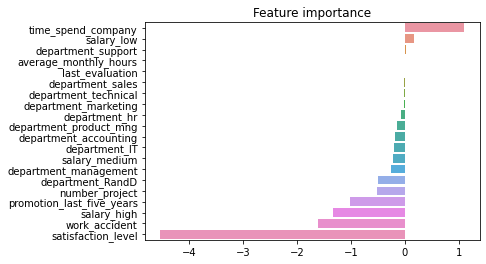

In [83]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, logreg.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Plot the feature importances
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

We've now tested the logreg on the validation data set. The model was decent but not great. Lets try a decision based tree now and see what we can make.


## Modeling type 2: Random Forest

In [87]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [3,5,7],
             'max_features': [1],
             'max_samples': [0.7,1.0],
             'min_samples_leaf': [1,2,3,5],
             'min_samples_split': [2,3,4,6],
             'n_estimators': [300,500],
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [88]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 5min 11s, sys: 0 ns, total: 5min 11s
Wall time: 5min 11s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [89]:
# Define a path to the folder where you want to save the model
path = 'D:\Documents\work\Google Advanced Data Analytics Course\capstone\project saves'

In [90]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [91]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [92]:
# Write pickle
write_pickle(path, rf_cv, 'hr_rf_cv')
# Read pickle
rf_cv= read_pickle(path, 'hr_rf_cv')

In [93]:
rf_cv.best_score_

0.9782122574146298

In [94]:
rf_cv.best_params_

{'max_depth': 7,
 'max_features': 1,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [95]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [132]:
rf_cv_results = make_results('RF cv', rf_cv, 'auc')
results_table = pd.concat([results_table, rf_cv_results], axis=0)
results_table

,model,precision,recall,F1,accuracy,auc
0,logreg_val,0.4700,0.260000,0.340000,0.830000,0.600000
0,RF cv,0.9826,0.560669,0.713531,0.924318,0.978212


## Modeling type 3:XGBoost

In [97]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,6,8,10],
             'min_child_weight': [3,4,5],
             'learning_rate': [0.01,0.1,0.2,0.3],
             'n_estimators': [300]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [98]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 9min 7s, sys: 1.04 s, total: 9min 8s
Wall time: 4min 35s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0

In [99]:
# Write pickle
write_pickle(path, xgb_cv, 'hr_xgb_cv')
# Read pickle
xgb_cv= read_pickle(path, 'hr_xgb_cv')

In [100]:
xgb_cv.best_score_

0.9800617686964981

In [101]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 300}

In [133]:
xgb_cv_results = make_results('xgb cv', xgb_cv, 'auc')
results_table = pd.concat([results_table, xgb_cv_results], axis=0)
results_table

,model,precision,recall,F1,accuracy,auc
0,logreg_val,0.470000,0.260000,0.340000,0.830000,0.600000
0,RF cv,0.982600,0.560669,0.713531,0.924318,0.978212
0,xgb cv,0.964355,0.913186,0.938027,0.979699,0.980062


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




## Model Selection and evaluation:



In [104]:
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [114]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    auc=roc_auc_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                          })

    return table

In [134]:
rf_val_preds = rf_cv.best_estimator_.predict(X_val)
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results_table = pd.concat([results_table, rf_val_scores], axis=0)
results_table

,model,precision,recall,F1,accuracy,auc
0,logreg_val,0.470000,0.260000,0.340000,0.830000,0.600000
0,RF cv,0.982600,0.560669,0.713531,0.924318,0.978212
0,xgb cv,0.964355,0.913186,0.938027,0.979699,0.980062
0,RF val,0.995098,0.539894,0.700000,0.922113,0.769678


In [135]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

results_table = pd.concat([results_table, xgb_val_scores], axis=0)
results_table

,model,precision,recall,F1,accuracy,auc
0,logreg_val,0.470000,0.260000,0.340000,0.830000,0.600000
0,RF cv,0.982600,0.560669,0.713531,0.924318,0.978212
0,xgb cv,0.964355,0.913186,0.938027,0.979699,0.980062
0,RF val,0.995098,0.539894,0.700000,0.922113,0.769678
0,XGB val,0.961219,0.922872,0.941655,0.980752,0.957669


## Evaluating the champion model

The XGB model as it performed the most effectively on the data, in comparison to the random forest and the logistic regression

In [136]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results_table = pd.concat([results_table, xgb_test_scores], axis=0)
results_table

,model,precision,recall,F1,accuracy,auc
0,logreg_val,0.470000,0.260000,0.340000,0.830000,0.600000
0,RF cv,0.982600,0.560669,0.713531,0.924318,0.978212
0,xgb cv,0.964355,0.913186,0.938027,0.979699,0.980062
0,RF val,0.995098,0.539894,0.700000,0.922113,0.769678
0,XGB val,0.961219,0.922872,0.941655,0.980752,0.957669
0,XGB test,0.985915,0.928382,0.956284,0.985676,0.962845


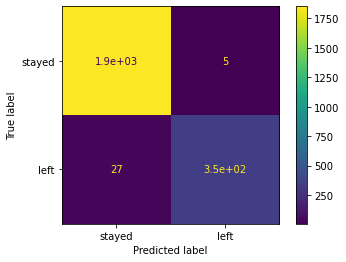

In [138]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['stayed', 'left'])
disp.plot();

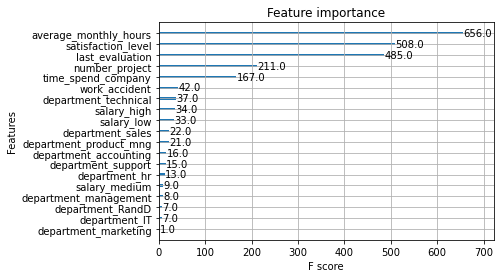

In [137]:
plot_importance(xgb_cv.best_estimator_);

### Summary of model results

1. The Xgboost model performed relatively well on the test validation and training sets. The final results after the model was trained on the test set where: Precision: 0.986, Recall: 0.928, F1 score: 0.956, Accuracy: 0.986, ROC AUC Score: 0.962.

### Conclusion, Recommendations, Next Steps

The final models most important features can be viewed above. From this graph we can see clearly that there is 5 variables that are heavily attributed to employees leaving the company. If we disregard satisfaction level and last evaluation from this list, (due to them being a representation of how the employee feels, or how the company feels about the employee) we can come to the conclusion that the other 3 variables most likely the driving factor in employee churn and satisfaction decrease.

These three variables are average monthly hours, number of projects,time spent in the company.

Lets being with Average monthly hours:

1. employees are working way to many hours. This needs to be changed immediantly as employees are quiting predomintantly due to overwork.
2. Employee hours need to be renumerated. If we need employees to work these sort of hours what can we provide in exchange to make them feel that they are sufficiently renumerated.

Number of projects:
1. The number of projects needs to be capped. With so many people working on multiple projects at once this leads to stress and overwork. Limiting projects numbers per employee seems like an effective method to increase satisfaction as most employees who worked more than 5 projects left the company.
2. Simiarly to working hours, if we need employees to take on so many projects at once, then we need to hire mor employees to efficiently deligate all this work too. One person can only handle so much work.

Time spent in the company:
1. One thing that was noticed throughout the analysis is the number of people who have a tenure within the company past 4 years. It seems most people leave because they never receive a promotion among other reasons. Putting in place new performance and promotion pathways for employees who have worked 2-3 years could improve employee retention.
2. Rewarding employees for loyalty. 

Extra points:
1. Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
2. High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 


Next Steps:
It would be benefitial rather to predict if an employee will stay or leave, but rather their evaluation score or their satisfaction level. Finding the driving variables towards why an employee is feeling satisfied and working well, or feeling unsatisfied and performing poorly could be benefitial in determining which areas the organisation can provide resources too in order to increase satisfaction and performance. Furthmore some variables in the analysis could be considered redundant. As I mentioned above an employees satisfaction level and evaluation are a subjective predictor of how the person feels or how the organisation feels about their performance. Removing these variables and conducting more analysis may lead to a more refined model. Different types of models such as KNN of decision trees, may also be useful for predicting employee turnover.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.